In [8]:
import os
import sys

import numpy as np
import pandas as pd
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
%cd  /content/drive/MyDrive/MLRG

/content/drive/MyDrive/MLRG


In [16]:
file_path = '/content/drive/MyDrive/MLRG/xgboost_data.csv'
data = pd.read_csv(file_path)

In [ ]:
unique_species = data['species'].unique()
unique_stress_names = data['stress_name'].unique()

print("Unique species values:", unique_species)
print("Unique stress names:", unique_stress_names)


Unique species values: [ 0  1  2  3  4  5  6  7  8 28  9 10 11 12 13 14 15 18 19 20 21 22 16 17
 23 26 27 24 25 29]
Unique stress names: [ 0  6  5  8  1  9  2  4  3  7 10]


For all

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Read CSV file, assuming the file path is '/content/drive/MyDrive/MLRG/xgboost_data.csv'
file_path = '/content/drive/MyDrive/MLRG/xgboost_data.csv'
data = pd.read_csv(file_path)

# Assume 'species' to 'stress_name' are feature columns, 'stress' is the target variable column
X = data[['species', 'CCT', 'CTT', 'TTC', 'TCC', 'CCA', 'CAA', 'AAG', 'AGC', 'GCT', 'TTA', 'TAC', 'ACG', 'CGA', 'GAC', 'GAG', 'AGG', 'GGG', 'GGT', 'GTT', 'TCG', 'GAT', 'ATT', 'CCC', 'TCA', 'CAC', 'ACC', 'CCG', 'CGC', 'CTC', 'GCA', 'CAG', 'AGT', 'GTA', 'ACA', 'CAT', 'ATG', 'TGC', 'GCC', 'TGT', 'GTG', 'TGG', 'GGC', 'TAG', 'AGA', 'ACT', 'TTG', 'TAA', 'GGA', 'GTC', 'GCG', 'CGT', 'ATC', 'AAA', 'AAT', 'TCT', 'TTT', 'CGG', 'TGA', 'GAA', 'AAC', 'CTG', 'CTA', 'TAT', 'ATA', 'CTN', 'TNN', 'NNN', 'NNG', 'NGT', 'TCN', 'CNN', 'NGG', 'TTN', 'TGN', 'GNN', 'NGA', 'CCN', 'CNC', 'NCG', 'CGN', 'GNC', 'NCC', 'NNC', 'NCT', 'GGN', 'GNG', 'NGC', 'GCN', 'CNG', 'ACN', 'TNT', 'NTA', 'TNG', 'TAK', 'AKC', 'KCA', 'CAK', 'AKT', 'KTC', 'AAN', 'ANG', 'TTR', 'TRG', 'RGA', 'stress_name']]
y = data['stress']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost regression model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)


Mean Squared Error: 0.6599996084138363


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# 计算决定系数（R²）
r2 = r2_score(y_test, y_pred)
print(f'R² Score: {r2}')

Mean Squared Error: 0.6599996084138363
R² Score: 0.14665180464943972


for each specie

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Read CSV file, assuming the file path is '/content/drive/MyDrive/MLRG/xgboost_data.csv'
file_path = '/content/drive/MyDrive/MLRG/xgboost_data.csv'
data = pd.read_csv(file_path)

# Different species values to try
species_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 28, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 16, 17, 23, 26, 27, 24, 25, 29]

# Store evaluation results for each model
results = []

# Loop over each species value to try
for species_value in species_values:
    # Subset data based on species value
    subset_data = data[data['species'] == species_value]

    # Skip the current species value if the subset is empty
    if subset_data.empty:
        print(f"No data found for species value {species_value}. Skipping...")
        continue

    # Extract features and target variable
    X = subset_data[['CCT', 'CTT', 'TTC', 'TCC', 'CCA', 'CAA', 'AAG', 'AGC', 'GCT', 'TTA', 'TAC', 'ACG', 'CGA', 'GAC', 'GAG', 'AGG', 'GGG', 'GGT', 'GTT', 'TCG', 'GAT', 'ATT', 'CCC', 'TCA', 'CAC', 'ACC', 'CCG', 'CGC', 'CTC', 'GCA', 'CAG', 'AGT', 'GTA', 'ACA', 'CAT', 'ATG', 'TGC', 'GCC', 'TGT', 'GTG', 'TGG', 'GGC', 'TAG', 'AGA', 'ACT', 'TTG', 'TAA', 'GGA', 'GTC', 'GCG', 'CGT', 'ATC', 'AAA', 'AAT', 'TCT', 'TTT', 'CGG', 'TGA', 'GAA', 'AAC', 'CTG', 'CTA', 'TAT', 'ATA', 'CTN', 'TNN', 'NNN', 'NNG', 'NGT', 'TCN', 'CNN', 'NGG', 'TTN', 'TGN', 'GNN', 'NGA', 'CCN', 'CNC', 'NCG', 'CGN', 'GNC', 'NCC', 'NNC', 'NCT', 'GGN', 'GNG', 'NGC', 'GCN', 'CNG', 'ACN', 'TNT', 'NTA', 'TNG', 'TAK', 'AKC', 'KCA', 'CAK', 'AKT', 'KTC', 'AAN', 'ANG', 'TTR', 'TRG', 'RGA', 'stress_name']]
    y = subset_data['stress']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define XGBoost regression model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R²)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the list
    results.append({
        'species_value': species_value,
        'MSE': mse,
        'R2': r2
    })

# Print evaluation results for each model
for result in results:
    print(f"Species value {result['species_value']}:")
    print(f"  MSE: {result['MSE']}")
    print(f"  R²: {result['R2']}")
    print()


Species value 0:
  MSE: 0.3879427141193254
  R²: 0.2102166284226381

Species value 1:
  MSE: 0.497220797827476
  R²: 0.5466792469472668

Species value 2:
  MSE: 0.29110561823549835
  R²: 0.2006216562597095

Species value 3:
  MSE: 0.23372613033527365
  R²: 0.33681852618241015

Species value 4:
  MSE: 0.6852418700471448
  R²: 0.34452556048639693

Species value 5:
  MSE: 0.09375749605880135
  R²: 0.39394719048963944

Species value 6:
  MSE: 0.49395921526954334
  R²: 0.2842220933860723

Species value 7:
  MSE: 0.8602375697198988
  R²: 0.36000401588137654

Species value 8:
  MSE: 0.6590158689938838
  R²: 0.35411755879671547

Species value 28:
  MSE: 0.9124931676327931
  R²: 0.2925458641590222

Species value 9:
  MSE: 0.3061976566261819
  R²: 0.33103838443257405

Species value 10:
  MSE: 0.3351228189048943
  R²: 0.28339569345771853

Species value 11:
  MSE: 0.19372752728300444
  R²: 0.40938198273821913

Species value 12:
  MSE: 0.211211884865255
  R²: 0.45643052912155746

Species value 13:


for each condition

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Read CSV file, assuming the file path is '/content/drive/MyDrive/MLRG/xgboost_data.csv'
file_path = '/content/drive/MyDrive/MLRG/xgboost_data.csv'
data = pd.read_csv(file_path)

# Different stress_name values to try
stress_names = [0, 6, 5, 8, 1, 9, 2, 4, 3, 7, 10]

# Store evaluation results for each model
results = []

# Loop over each stress_name value to try
for stress_name_value in stress_names:
    # Subset data based on stress_name value
    subset_data = data[data['stress_name'] == stress_name_value]

    # Skip the current stress_name value if the subset is empty
    if subset_data.empty:
        print(f"No data found for stress_name value {stress_name_value}. Skipping...")
        continue

    # Extract features and target variable
    X = subset_data[['species', 'CCT', 'CTT', 'TTC', 'TCC', 'CCA', 'CAA', 'AAG', 'AGC', 'GCT', 'TTA', 'TAC', 'ACG', 'CGA', 'GAC', 'GAG', 'AGG', 'GGG', 'GGT', 'GTT', 'TCG', 'GAT', 'ATT', 'CCC', 'TCA', 'CAC', 'ACC', 'CCG', 'CGC', 'CTC', 'GCA', 'CAG', 'AGT', 'GTA', 'ACA', 'CAT', 'ATG', 'TGC', 'GCC', 'TGT', 'GTG', 'TGG', 'GGC', 'TAG', 'AGA', 'ACT', 'TTG', 'TAA', 'GGA', 'GTC', 'GCG', 'CGT', 'ATC', 'AAA', 'AAT', 'TCT', 'TTT', 'CGG', 'TGA', 'GAA', 'AAC', 'CTG', 'CTA', 'TAT', 'ATA', 'CTN', 'TNN', 'NNN', 'NNG', 'NGT', 'TCN', 'CNN', 'NGG', 'TTN', 'TGN', 'GNN', 'NGA', 'CCN', 'CNC', 'NCG', 'CGN', 'GNC', 'NCC', 'NNC', 'NCT', 'GGN', 'GNG', 'NGC', 'GCN', 'CNG', 'ACN', 'TNT', 'NTA', 'TNG', 'TAK', 'AKC', 'KCA', 'CAK', 'AKT', 'KTC', 'AAN', 'ANG', 'TTR', 'TRG', 'RGA']]
    y = subset_data['stress']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define XGBoost regression model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate R-squared (R²)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the list
    results.append({
        'stress_name_value': stress_name_value,
        'MSE': mse,
        'R2': r2
    })

# Print evaluation results for each model
for result in results:
    print(f"Stress_name value {result['stress_name_value']}:")
    print(f"  MSE: {result['MSE']}")
    print(f"  R²: {result['R2']}")
    print()


Stress_name value 0:
  MSE: 0.4308835015691533
  R²: 0.11318769504081083

Stress_name value 6:
  MSE: 0.512110705345599
  R²: 0.10164727736364398

Stress_name value 5:
  MSE: 0.4946511254223298
  R²: 0.07012923372058621

Stress_name value 8:
  MSE: 1.2393660650353115
  R²: 0.19657582062082768

Stress_name value 1:
  MSE: 0.32173865781860544
  R²: 0.052752548115738374

Stress_name value 9:
  MSE: 0.4783437343827615
  R²: 0.05318572163470414

Stress_name value 2:
  MSE: 0.5393960716437252
  R²: 0.03275230468829926

Stress_name value 4:
  MSE: 1.0988947036353913
  R²: 0.11734631591658773

Stress_name value 3:
  MSE: 1.0657690169441276
  R²: 0.12220855803922015

Stress_name value 7:
  MSE: 0.641283104670371
  R²: 0.06798568743782551

Stress_name value 10:
  MSE: 0.727599522645649
  R²: 0.08883227635310986



plot

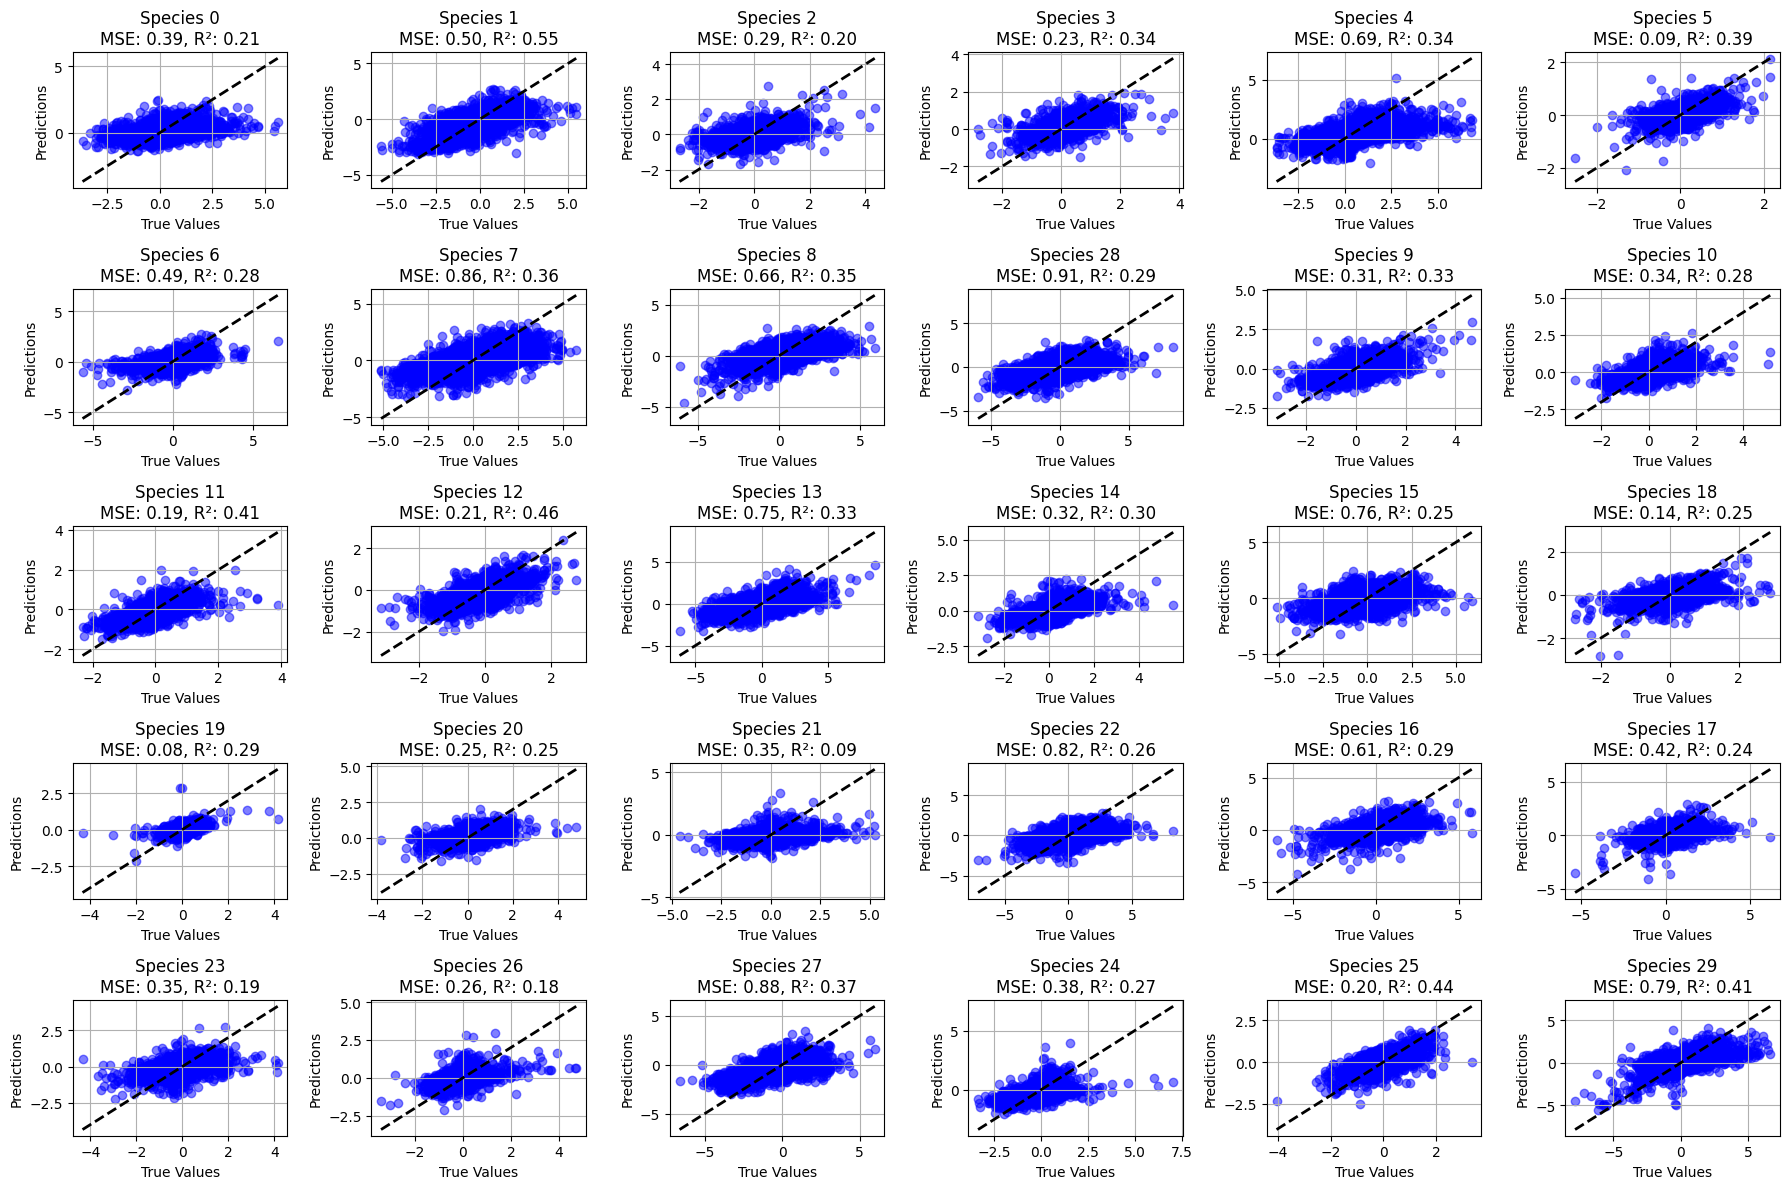

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Different species values to try
species_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 28, 9, 10, 11, 12, 13, 14, 15, 18, 19, 20, 21, 22, 16, 17, 23, 26, 27, 24, 25, 29]

# Store evaluation results for each species
results = []

# Set the number of rows and columns for subplots
num_rows = 5
num_cols = 6

# Create the figure and axes for subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

# Loop over each species value to try
for idx, species_value in enumerate(species_values):
    # Subset data based on species value
    subset_data = data[data['species'] == species_value]

    # Skip the current species value if the subset is empty
    if subset_data.empty:
        print(f"No data found for species value {species_value}. Skipping...")
        continue

    # Extract features and target variable
    X = subset_data[['CCT', 'CTT', 'TTC', 'TCC', 'CCA', 'CAA', 'AAG', 'AGC', 'GCT', 'TTA', 'TAC', 'ACG', 'CGA', 'GAC', 'GAG', 'AGG', 'GGG', 'GGT', 'GTT', 'TCG', 'GAT', 'ATT', 'CCC', 'TCA', 'CAC', 'ACC', 'CCG', 'CGC', 'CTC', 'GCA', 'CAG', 'AGT', 'GTA', 'ACA', 'CAT', 'ATG', 'TGC', 'GCC', 'TGT', 'GTG', 'TGG', 'GGC', 'TAG', 'AGA', 'ACT', 'TTG', 'TAA', 'GGA', 'GTC', 'GCG', 'CGT', 'ATC', 'AAA', 'AAT', 'TCT', 'TTT', 'CGG', 'TGA', 'GAA', 'AAC', 'CTG', 'CTA', 'TAT', 'ATA', 'CTN', 'TNN', 'NNN', 'NNG', 'NGT', 'TCN', 'CNN', 'NGG', 'TTN', 'TGN', 'GNN', 'NGA', 'CCN', 'CNC', 'NCG', 'CGN', 'GNC', 'NCC', 'NNC', 'NCT', 'GGN', 'GNG', 'NGC', 'GCN', 'CNG', 'ACN', 'TNT', 'NTA', 'TNG', 'TAK', 'AKC', 'KCA', 'CAK', 'AKT', 'KTC', 'AAN', 'ANG', 'TTR', 'TRG', 'RGA', 'stress_name']]
    y = subset_data['stress']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define XGBoost regression model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Calculate Mean Squared Error (MSE) and R-squared (R²)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the list
    results.append({
        'species_value': species_value,
        'MSE': mse,
        'R2': r2
    })

    # Plot true vs predicted values in a subplot
    row = idx // num_cols
    col = idx % num_cols
    ax = axes[row, col]
    ax.scatter(y_test, y_pred, color='blue', alpha=0.5)
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    ax.set_title(f'Species {species_value}\nMSE: {mse:.2f}, R²: {r2:.2f}')
    ax.set_xlabel('True Values')
    ax.set_ylabel('Predictions')
    ax.grid(True)

# Adjust layout and display the figure
plt.tight_layout()
plt.show()


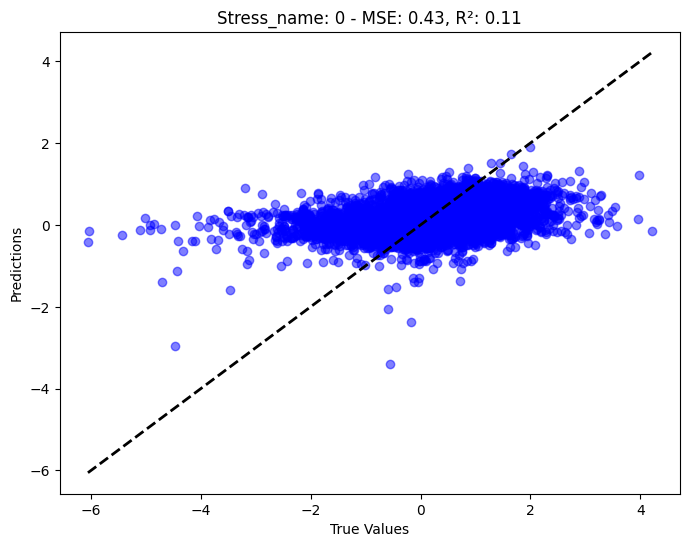

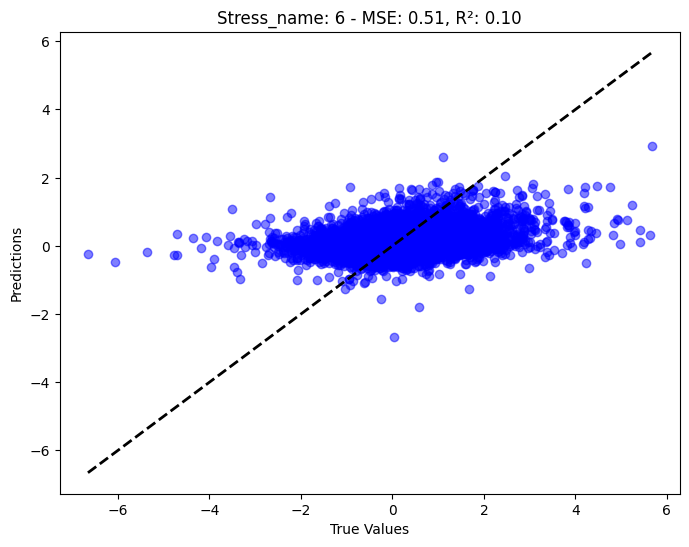

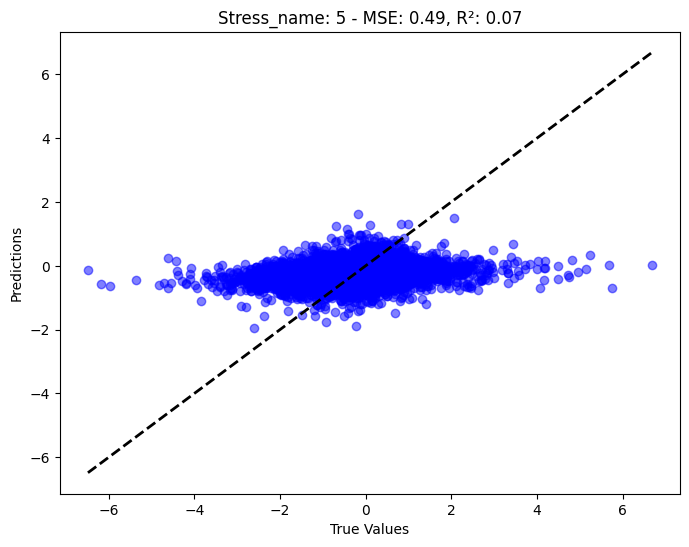

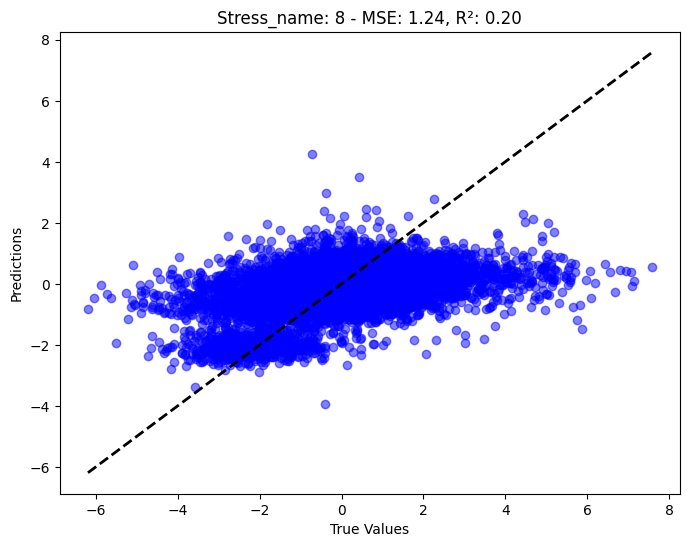

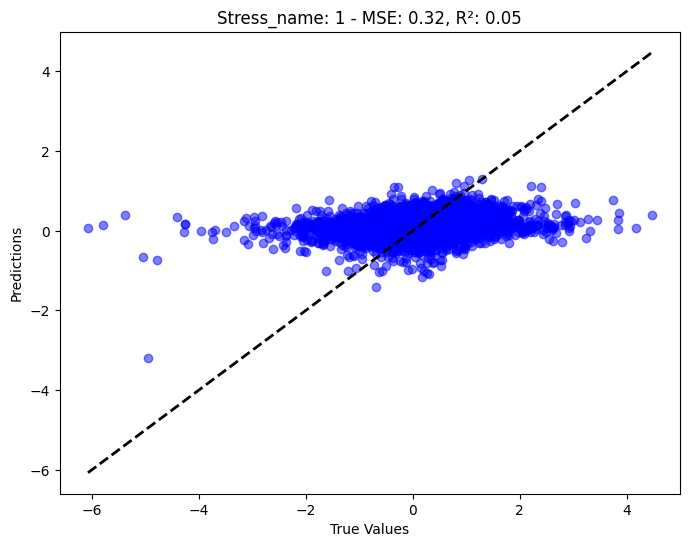

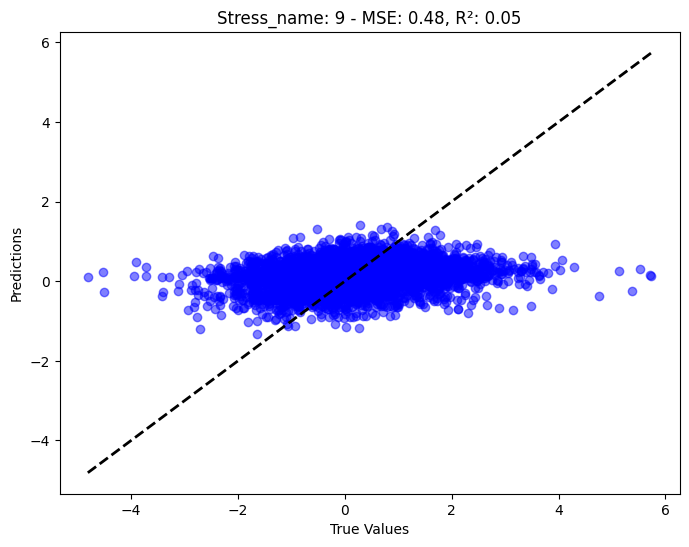

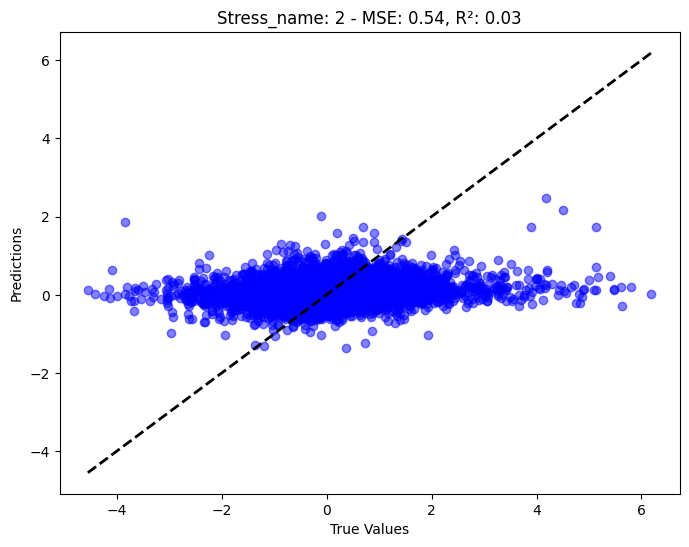

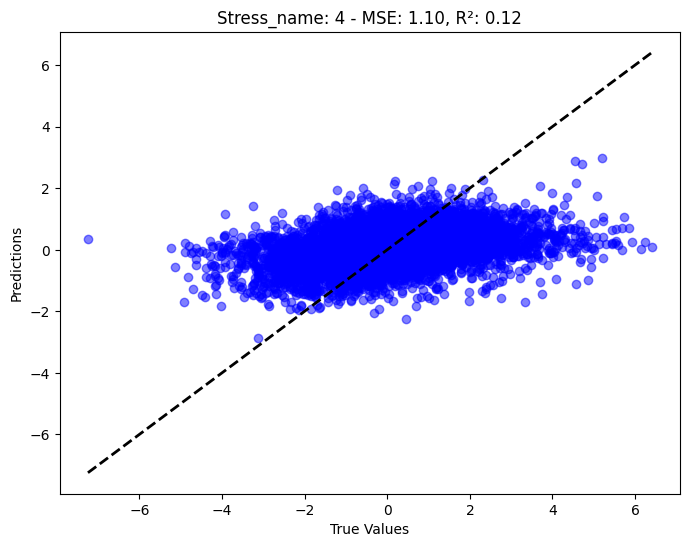

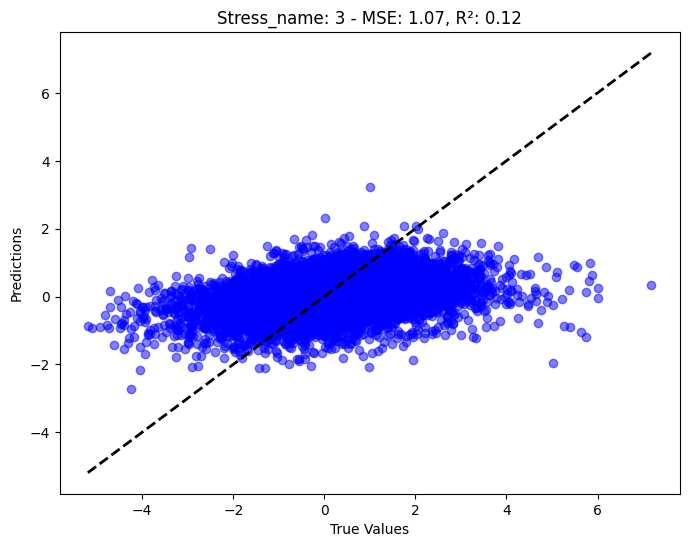

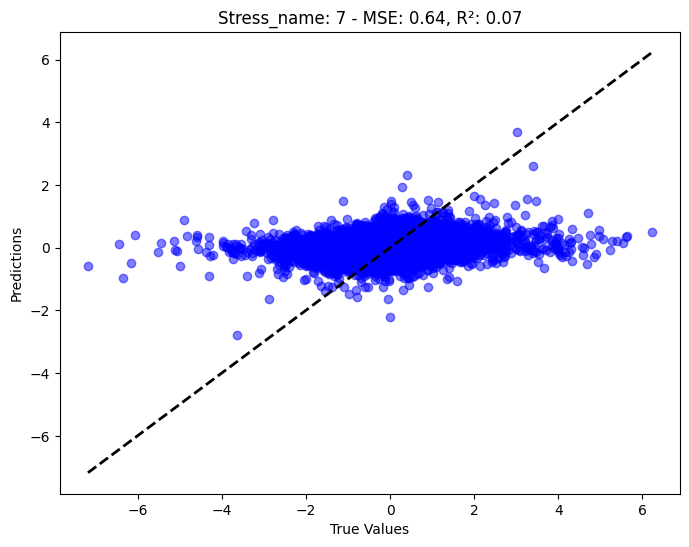

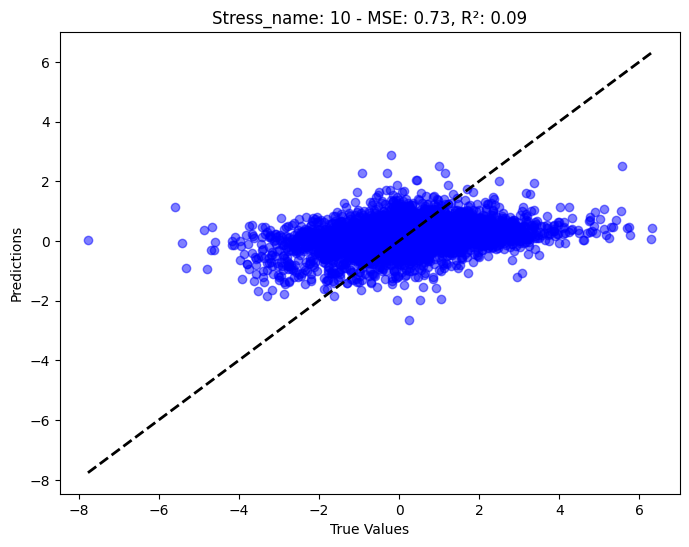

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming data is loaded from a CSV file
file_path = '/content/drive/MyDrive/MLRG/xgboost_data.csv'
data = pd.read_csv(file_path)

# Different stress_name values to try
stress_names = [0, 6, 5, 8, 1, 9, 2, 4, 3, 7, 10]

# Store evaluation results and predictions for each model
results = []

# Loop over each stress_name value to try
for stress_name_value in stress_names:
    # Subset data based on stress_name value
    subset_data = data[data['stress_name'] == stress_name_value]

    # Skip the current stress_name value if the subset is empty
    if subset_data.empty:
        print(f"No data found for stress_name value {stress_name_value}. Skipping...")
        continue

    # Extract features and target variable
    X = subset_data[['species', 'CCT', 'CTT', 'TTC', 'TCC', 'CCA', 'CAA', 'AAG', 'AGC', 'GCT', 'TTA', 'TAC', 'ACG', 'CGA', 'GAC', 'GAG', 'AGG', 'GGG', 'GGT', 'GTT', 'TCG', 'GAT', 'ATT', 'CCC', 'TCA', 'CAC', 'ACC', 'CCG', 'CGC', 'CTC', 'GCA', 'CAG', 'AGT', 'GTA', 'ACA', 'CAT', 'ATG', 'TGC', 'GCC', 'TGT', 'GTG', 'TGG', 'GGC', 'TAG', 'AGA', 'ACT', 'TTG', 'TAA', 'GGA', 'GTC', 'GCG', 'CGT', 'ATC', 'AAA', 'AAT', 'TCT', 'TTT', 'CGG', 'TGA', 'GAA', 'AAC', 'CTG', 'CTA', 'TAT', 'ATA', 'CTN', 'TNN', 'NNN', 'NNG', 'NGT', 'TCN', 'CNN', 'NGG', 'TTN', 'TGN', 'GNN', 'NGA', 'CCN', 'CNC', 'NCG', 'CGN', 'GNC', 'NCC', 'NNC', 'NCT', 'GGN', 'GNG', 'NGC', 'GCN', 'CNG', 'ACN', 'TNT', 'NTA', 'TNG', 'TAK', 'AKC', 'KCA', 'CAK', 'AKT', 'KTC', 'AAN', 'ANG', 'TTR', 'TRG', 'RGA']]
    y = subset_data['stress']

    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define XGBoost regression model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = xgb_model.predict(X_test)

    # Calculate Mean Squared Error (MSE) and R-squared (R²)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store the results in the list
    results.append({
        'stress_name_value': stress_name_value,
        'MSE': mse,
        'R2': r2,
        'y_test': y_test,
        'y_pred': y_pred
    })

# Plotting true vs predicted values for each stress_name
for result in results:
    stress_name_value = result['stress_name_value']
    y_test = result['y_test']
    y_pred = result['y_pred']

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title(f'Stress_name: {stress_name_value} - MSE: {result["MSE"]:.2f}, R²: {result["R2"]:.2f}')
    plt.show()
